In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df=pd.read_csv(r'D:\Download\Download\DC_Properties_trimmed\DC_Properties_trimmed.csv')
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


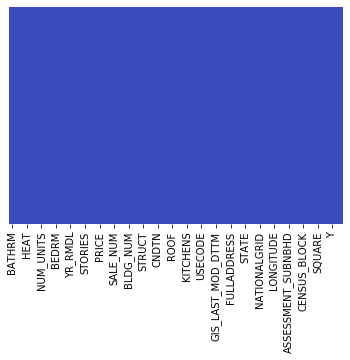

In [80]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [81]:
df.dtypes

BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS               int64
ROOMS                   int64
BEDRM                   int64
AYB                     int64
YR_RMDL                 int64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                   int64
QUALIFIED              object
SALE_NUM                int64
GBA                     int64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS                int64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
FULLADDRESS            object
CITY                   object
STATE                  object
ZIPCODE   

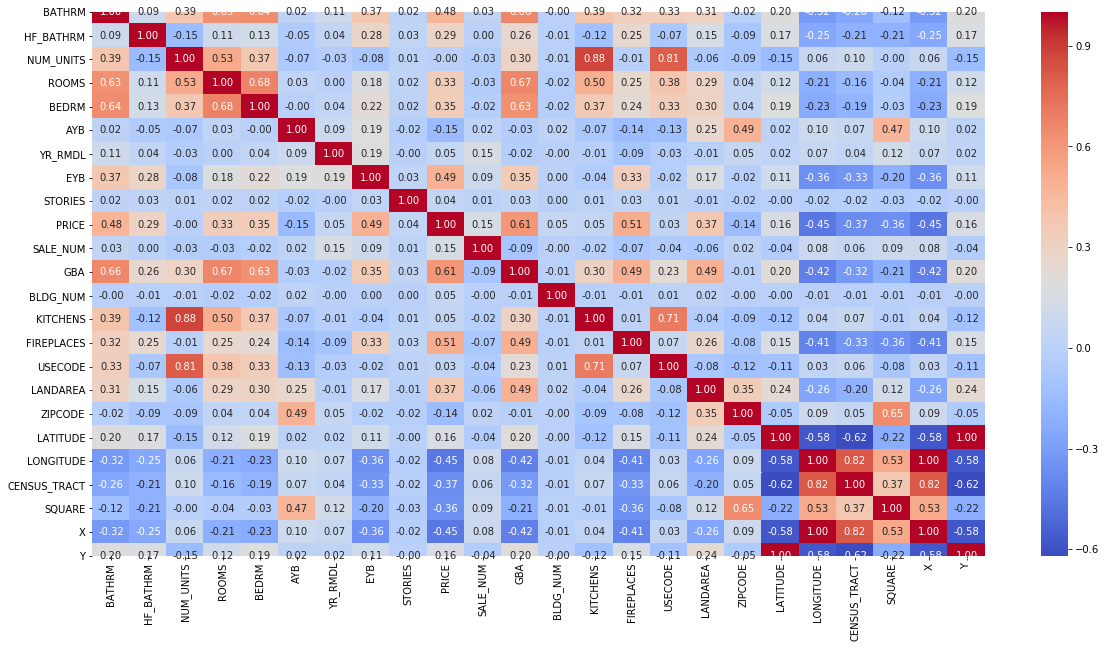

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt=".2f")

In [83]:
df.corr()['PRICE'][abs(df.corr()['PRICE'])>0.5]

PRICE         1.00000
GBA           0.60768
FIREPLACES    0.51010
Name: PRICE, dtype: float64

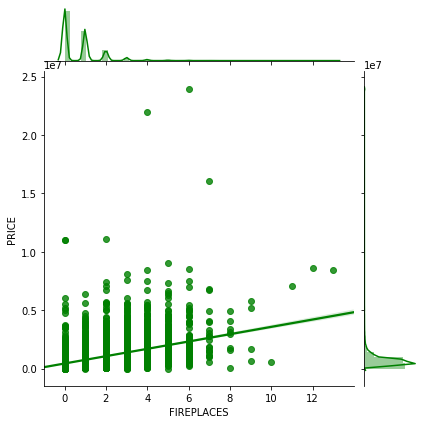

In [102]:
sns.jointplot(x='FIREPLACES',y='PRICE',data=df,kind='reg',color='g')


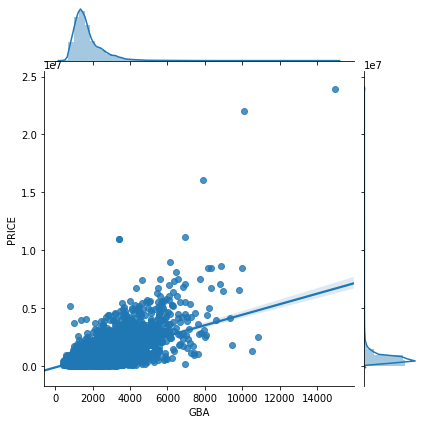

In [103]:
sns.jointplot(x='GBA',y='PRICE',data=df,kind='reg')

In [84]:
categorical_features=df.select_dtypes(include='object')
categorical_features.columns

Index(['HEAT', 'AC', 'SALEDATE', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'GIS_LAST_MOD_DTTM', 'SOURCE',
       'FULLADDRESS', 'CITY', 'STATE', 'NATIONALGRID', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK', 'WARD', 'QUADRANT'],
      dtype='object')

[Text(0, 0, 'Q'), Text(0, 0, 'U')]

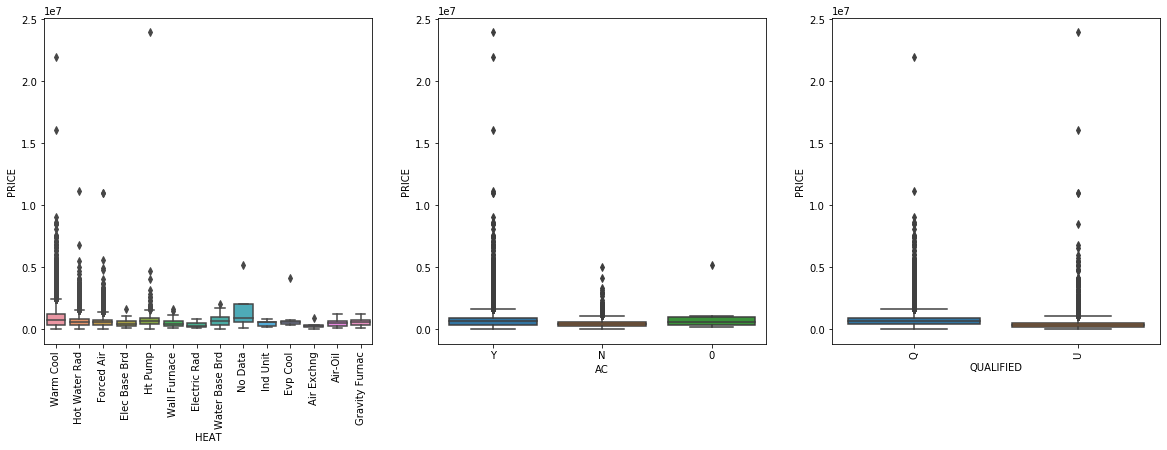

In [85]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))

sns.boxplot(x='HEAT',y='PRICE',data=df,ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

sns.boxplot(x='AC',y='PRICE',data=df,ax=ax2)

sns.boxplot(x='QUALIFIED',y='PRICE',data=df,ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)


[Text(0, 0, 'Very Good'),
 Text(0, 0, 'Above Average'),
 Text(0, 0, 'Good Quality'),
 Text(0, 0, 'Excellent'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Superior'),
 Text(0, 0, 'Fair Quality'),
 Text(0, 0, 'Exceptional-C'),
 Text(0, 0, 'Exceptional-A'),
 Text(0, 0, 'Exceptional-B'),
 Text(0, 0, 'Exceptional-D'),
 Text(0, 0, 'No Data')]

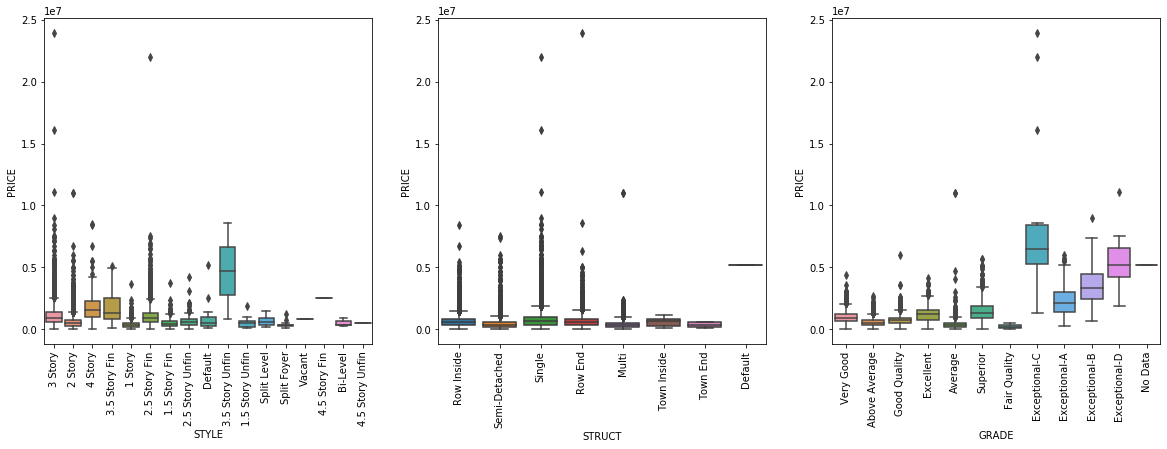

In [86]:
fig,(ax4,ax5,ax6)=plt.subplots(1,3,figsize=(20,6))

sns.boxplot(x='STYLE',y='PRICE',data=df,ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)

sns.boxplot(x='STRUCT',y='PRICE',data=df,ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)

sns.boxplot(x='GRADE',y='PRICE',data=df,ax=ax6)
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)



[Text(0, 0, 'Hardwood'),
 Text(0, 0, 'Wood Floor'),
 Text(0, 0, 'Carpet'),
 Text(0, 0, 'Hardwood/Carp'),
 Text(0, 0, 'Ceramic Tile'),
 Text(0, 0, 'Lt Concrete'),
 Text(0, 0, 'Default'),
 Text(0, 0, 'Parquet'),
 Text(0, 0, 'Resiliant'),
 Text(0, 0, 'Vinyl Sheet'),
 Text(0, 0, 'Terrazo'),
 Text(0, 0, 'Vinyl Comp')]

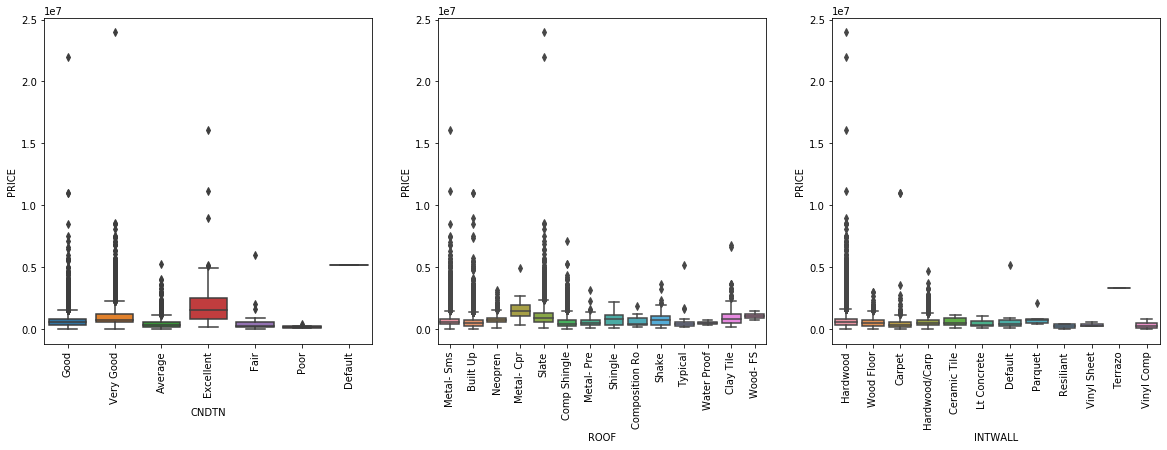

In [87]:
fig,(ax7,ax8,ax9)=plt.subplots(1,3,figsize=(20,6))

sns.boxplot(x='CNDTN',y='PRICE',data=df,ax=ax7)
ax7.set_xticklabels(ax7.get_xticklabels(),rotation=90)

sns.boxplot(x='ROOF',y='PRICE',data=df,ax=ax8)
ax8.set_xticklabels(ax8.get_xticklabels(),rotation=90)

sns.boxplot(x='INTWALL',y='PRICE',data=df,ax=ax9)
ax9.set_xticklabels(ax9.get_xticklabels(),rotation=90)


[Text(0, 0, 'NW'), Text(0, 0, 'SW'), Text(0, 0, 'SE'), Text(0, 0, 'NE')]

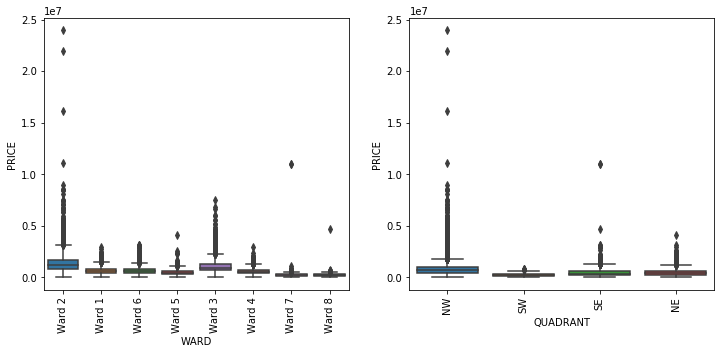

In [88]:
fig,(ax10,ax11)=plt.subplots(1,2,figsize=(12,5))


sns.boxplot(x='WARD',y='PRICE',data=df,ax=ax10)
ax10.set_xticklabels(ax10.get_xticklabels(),rotation=90)

sns.boxplot(x='QUADRANT',y='PRICE',data=df,ax=ax11)
ax11.set_xticklabels(ax11.get_xticklabels(),rotation=90)

In [89]:
from scipy.stats import f_oneway

for i in categorical_features.columns:
    if len(df[i].value_counts())<20:
        if i in ['GIS_LAST_MOD_DTTM','SOURCE','CITY','STATE']:
            continue
        df_anaova=df[[i,'PRICE']]
        group_anova=df_anaova.groupby([i])
        anova_test=f_oneway(group_anova.get_group(df[i].value_counts().index[0])['PRICE'],
                            group_anova.get_group(df[i].value_counts().index[1])['PRICE'])
        print('Name: {},F-statistic:{},P-value:{}'.format(i,anova_test[0],anova_test[1]))
        

Name: HEAT,F-statistic:10.859536770266194,P-value:0.0009844533681543982
Name: AC,F-statistic:987.1718355135989,P-value:4.275428821866188e-213
Name: QUALIFIED,F-statistic:775.4757175025544,P-value:1.9485285088913227e-168
Name: STYLE,F-statistic:3104.7108897856774,P-value:0.0
Name: STRUCT,F-statistic:299.1185709182544,P-value:1.5184885422682674e-66
Name: GRADE,F-statistic:1367.6122438613045,P-value:8.988530622348352e-289
Name: CNDTN,F-statistic:1375.5338533627532,P-value:3.8964264858376655e-293
Name: ROOF,F-statistic:237.7987934065484,P-value:2.433306670969219e-53
Name: INTWALL,F-statistic:152.91717702974614,P-value:5.018160538776691e-35
Name: WARD,F-statistic:757.826128786131,P-value:1.2979076741494762e-161
Name: QUADRANT,F-statistic:2163.7326320004745,P-value:0.0


In [90]:
X=df[['GBA','FIREPLACES','STYLE','GRADE','CNDTN']]

y=df['PRICE']

In [91]:
X=pd.get_dummies(X,columns=['STYLE','GRADE','CNDTN',],drop_first=True)

In [92]:
X.head()

,GBA,FIREPLACES,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,STYLE_3 Story,STYLE_3.5 Story Fin,STYLE_3.5 Story Unfin,...,GRADE_Good Quality,GRADE_No Data,GRADE_Superior,GRADE_Very Good,CNDTN_Default,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good
0,2522,5,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2522,4,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2484,3,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2401,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1488,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [94]:
lr=LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

lr.fit(X_train,y_train)

y_predict=lr.predict(X_test)

print('Train score: {},Test score: {}, R2 score: {}'.format(lr.score(X_train_scaled,y_train),
                                                            lr.score(X_test_scaled,y_test),
                                                            r2_score(y_test,y_predict)))


Train score: -0.7208113748227358,Test score: -0.5820078365889252, R2 score: 0.604661119541442


In [95]:
mc=MinMaxScaler()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

X_train_scaled=mc.fit_transform(X_train)

X_test_scaled=mc.transform(X_test)

alapha_value=range(1,41)

for i in alapha_value:

    ls=Lasso(alpha=i,max_iter=10000)

    ls.fit(X_train_scaled,y_train)

    y_predict=ls.predict(X_test_scaled)

    print('Train score: {},Test score: {}, R2 score: {}'.format(ls.score(X_train_scaled,y_train),
                                                                ls.score(X_test_scaled,y_test),
                                                                r2_score(y_test,y_predict)))



Train score: 0.6492430619354654,Test score: 0.5872292033900941, R2 score: 0.5872292033900941
Train score: 0.6492423796919712,Test score: 0.5872684173283211, R2 score: 0.5872684173283211
Train score: 0.6492412428694487,Test score: 0.5873075308065677, R2 score: 0.5873075308065677
Train score: 0.6492396515927905,Test score: 0.5873465441786396, R2 score: 0.5873465441786396
Train score: 0.6492376042217971,Test score: 0.5873854575494105, R2 score: 0.5873854575494105
Train score: 0.6492353205151336,Test score: 0.5874242614224751, R2 score: 0.5874242614224751
Train score: 0.6492326245249229,Test score: 0.587462969511704, R2 score: 0.587462969511704
Train score: 0.6492295108149884,Test score: 0.587501580314882, R2 score: 0.587501580314882
Train score: 0.6492259842703771,Test score: 0.5875400959531365, R2 score: 0.5875400959531365
Train score: 0.6492224306659443,Test score: 0.5875785207519293, R2 score: 0.5875785207519293
Train score: 0.6492192585404476,Test score: 0.5876168645092139, R2 score: 

In [96]:


alapha_value=range(1,41)

for i in alapha_value:
    
        rd=Ridge(alpha=i)

        rd.fit(X_train_scaled,y_train)

        y_predict=rd.predict(X_test_scaled)

        print('Train score: {},Test score: {}, R2 score: {}'.format(rd.score(X_train_scaled,y_train),
                                                                rd.score(X_test_scaled,y_test),
                                                                r2_score(y_test,y_predict)))


Train score: 0.6482172726048913,Test score: 0.5923162691446902, R2 score: 0.5923162691446902
Train score: 0.6463782452931908,Test score: 0.5954417929663021, R2 score: 0.5954417929663021
Train score: 0.644268110705083,Test score: 0.5973346115941014, R2 score: 0.5973346115941014
Train score: 0.6420415663017225,Test score: 0.5984103192823762, R2 score: 0.5984103192823762
Train score: 0.6397686641164918,Test score: 0.5989190293455853, R2 score: 0.5989190293455853
Train score: 0.6374867252194718,Test score: 0.599020838053966, R2 score: 0.599020838053966
Train score: 0.6352171202237381,Test score: 0.598823149738189, R2 score: 0.598823149738189
Train score: 0.6329724972953715,Test score: 0.5984007457920111, R2 score: 0.5984007457920111
Train score: 0.6307603932812316,Test score: 0.5978072697997581, R2 score: 0.5978072697997581
Train score: 0.6285852081279297,Test score: 0.5970821474231522, R2 score: 0.5970821474231522
Train score: 0.626449353868939,Test score: 0.596254939784149, R2 score: 0.5

In [97]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)

X_poly=poly.fit_transform(X)

X_test,X_train,y_test,y_train=train_test_split(X_poly,y,test_size=0.3)

lr_poly=LinearRegression()

lr_poly.fit(X_train,y_train)

y_predict=lr_poly.predict(X_test)

print(lr_poly.score(X_train,y_train))

print(lr_poly.score(X_test,y_test))

print(r2_score(y_test,y_predict))

0.712647801441535
0.6202339136491619
0.6202339136491619


In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
for i in range(1,10):
    rf=RandomForestRegressor(n_estimators=10,max_features=i).fit(X_train,y_train)
    y_predict=rf.predict(X_test)
    print('Train score: {}.Test score: {}, R2 score: {}'.format(rf.score(X_train,y_train),
                                                                rf.score(X_test,y_test),
                                                                r2_score(y_test,y_predict)))

Train score: 0.8873222203631564.Test score: 0.48816712802848145, R2 score: 0.4881671280284814
Train score: 0.8858459824627338.Test score: 0.48422111766972, R2 score: 0.48422111766972
Train score: 0.8843203236087199.Test score: 0.49310228976585224, R2 score: 0.49310228976585224
Train score: 0.8864921891972135.Test score: 0.4898264838146845, R2 score: 0.4898264838146845
Train score: 0.8926657903522565.Test score: 0.47620104018172216, R2 score: 0.47620104018172216
Train score: 0.888071674281653.Test score: 0.5055598220117712, R2 score: 0.5055598220117712
Train score: 0.8785659980734329.Test score: 0.4923394489310348, R2 score: 0.49233944893103476
Train score: 0.8932765177538022.Test score: 0.4975571769658395, R2 score: 0.49755717696583956
Train score: 0.8906459085591597.Test score: 0.4783730263640189, R2 score: 0.4783730263640189
